In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [32]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")
features = ["score_difference", "timestep", "type.id", "relative_strength", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML


In [39]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2023, 2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

Loading data for 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for 2015
skipping  2015
Loading data for .DS_Store
Loading data for 2017
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2017/game_400951752.csv
[ 0.     0.775  0.     0.739  0.     1.    51.    10.     7.     2.
  3.   ]
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2017/game_400951752.csv
[ 0.     0.78   0.     0.739  0.     1.    51.    10.     7.     2.
  3.   ]
  NaN Label found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2017/game_400951632.csv
  NaN Label found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/evalRTPF/R/NFL/ML/dataset_interpolated_with_overtime/2017

In [75]:
# Get information about the data
for timestep in training_data:
    print(f"timestep: {timestep}, number of instances: {len(training_data[timestep])}")

timestep: 0.0, number of instances: 2027
timestep: 0.005, number of instances: 1505
timestep: 0.01, number of instances: 1361
timestep: 0.015, number of instances: 1494
timestep: 0.02, number of instances: 1407
timestep: 0.025, number of instances: 1522
timestep: 0.03, number of instances: 1493
timestep: 0.035, number of instances: 1508
timestep: 0.04, number of instances: 1523
timestep: 0.045, number of instances: 1501
timestep: 0.05, number of instances: 1522
timestep: 0.055, number of instances: 1545
timestep: 0.06, number of instances: 1539
timestep: 0.065, number of instances: 1568
timestep: 0.07, number of instances: 1549
timestep: 0.075, number of instances: 1586
timestep: 0.08, number of instances: 1579
timestep: 0.085, number of instances: 1533
timestep: 0.09, number of instances: 1590
timestep: 0.095, number of instances: 1585
timestep: 0.1, number of instances: 1612
timestep: 0.105, number of instances: 1563
timestep: 0.11, number of instances: 1600
timestep: 0.115, number o

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# Define which features to scale vs. passthrough
numeric_features = [
    "homeScore", "awayScore", "start.down", "start.distance", "start.yardLine",
    "end.down", "end.distance", "end.yardLine",
]
other_features = ["relative_strength", "scoringPlay", "home_has_possession", "home_timeouts_left", "away_timeouts_left"] # for timestep in training_data.keys():


numeric_feature_indices = [
    0,  # score_difference
    1,  # relative_strength  
    4,  # end.down
    5,  # end.yardsToEndzone
    6,  # end.distance
    7,  # field_position_shift
]

# Features that should NOT be scaled (categorical/binary/discrete)
other_feature_indices = [
    2,  # type.id (categorical)
    3,  # home_has_possession (binary)
    8,  # home_timeouts_left (discrete 0-3)
    9,  # away_timeouts_left (discrete 0-3)
]

print("Features to be scaled:", numeric_features)
print("Features to passthrough:", other_features)

# Scale the data pipeline (using column indices for numpy arrays)
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_feature_indices),
    ("passthrough", "passthrough", other_feature_indices)
])

# No scaling pipeline (for comparison)
preprocessor_no_scaling = ColumnTransformer(transformers=[
    ("passthrough", "passthrough", list(range(len(features))))
])
# TO DO:
# - Rounding for end games
# - Only keep home_has_possession + timeouts_left + everything I had before - DONE
# - Kernel based methods
#   - At least 10 data points to do an estimation
#   - Score difference - make it categorical

Features to be scaled: ['homeScore', 'awayScore', 'start.down', 'start.distance', 'start.yardLine', 'end.down', 'end.distance', 'end.yardLine']
Features to passthrough: ['relative_strength', 'scoringPlay', 'home_has_possession', 'home_timeouts_left', 'away_timeouts_left']


In [49]:
modules_to_reload = [
    'kernel_methods.direct_prediction_network',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from kernel_methods.direct_prediction_network import setup_direct_models


models = setup_direct_models(training_data, test_data, num_models = 201)


Training direct prediction model for timestep range [0.0, 0.005]
Fitting scaler on training data...
Starting training on device: cpu
Early stopping at epoch 14
Best epoch: 4, Train Acc: 0.6387, Train Loss: 0.6362, Val Acc: 0.6622, Val Loss: 0.6310
Restored model from best epoch 4 with val_loss: 0.630989
Direct prediction model saved: saved_models/nfl_direct_model_direct_0.0-0.005_ep4_valAcc0.6622_valLoss0.6310.pth
NFL direct model 1/201 completed

Training direct prediction model for timestep range [0.005, 0.01]
Fitting scaler on training data...
Starting training on device: cpu
Early stopping at epoch 41
Best epoch: 31, Train Acc: 0.6577, Train Loss: 0.6170, Val Acc: 0.6519, Val Loss: 0.6398
Restored model from best epoch 31 with val_loss: 0.639816
Direct prediction model saved: saved_models/nfl_direct_model_direct_0.005-0.01_ep31_valAcc0.6519_valLoss0.6398.pth
NFL direct model 2/201 completed

Training direct prediction model for timestep range [0.01, 0.015]
Fitting scaler on traini

Timestep 0.00%: Test Accuracy = 0.6588
Timestep 0.50%: Test Accuracy = 0.6404
Timestep 1.00%: Test Accuracy = 0.6401
Timestep 1.50%: Test Accuracy = 0.6629
Timestep 2.00%: Test Accuracy = 0.6395
Timestep 2.50%: Test Accuracy = 0.6424
Timestep 3.00%: Test Accuracy = 0.6423
Timestep 3.50%: Test Accuracy = 0.6397
Timestep 4.00%: Test Accuracy = 0.6114
Timestep 4.50%: Test Accuracy = 0.6424
Timestep 5.00%: Test Accuracy = 0.6590
Timestep 5.50%: Test Accuracy = 0.6515
Timestep 6.00%: Test Accuracy = 0.6504
Timestep 6.50%: Test Accuracy = 0.6396
Timestep 7.00%: Test Accuracy = 0.6505
Timestep 7.50%: Test Accuracy = 0.6321
Timestep 8.00%: Test Accuracy = 0.6613
Timestep 8.50%: Test Accuracy = 0.6938
Timestep 9.00%: Test Accuracy = 0.6197
Timestep 9.50%: Test Accuracy = 0.6573
Timestep 10.00%: Test Accuracy = 0.6511
Timestep 10.50%: Test Accuracy = 0.6720
Timestep 11.00%: Test Accuracy = 0.6478
Timestep 11.50%: Test Accuracy = 0.6700
Timestep 12.00%: Test Accuracy = 0.6799
Timestep 12.50%: Tes

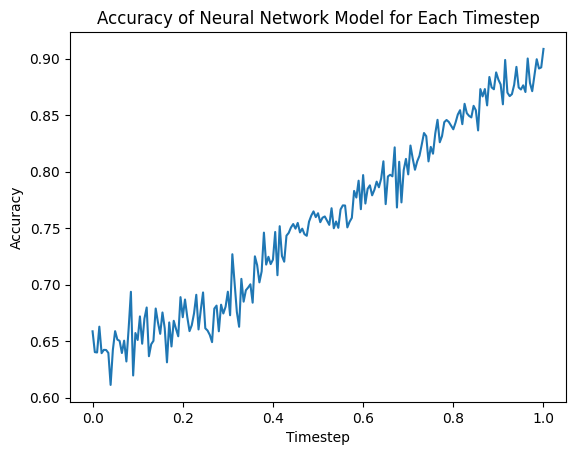

In [50]:
# Test accuracy of model for each timestep on test data and plot
accuracies = []
timesteps = []
for timestep in test_data.keys():
    model = models[timestep]
    # Convert test data to array
    y_test = np.array([row["label"] for row in test_data[timestep]])
    X_test = np.array([row["rows"].reshape(-1) for row in test_data[timestep]])
    # Evaluate model using the pipeline (preprocessing + logistic regression)
    test_accuracy = model.score(X_test, y_test)
    print(f"Timestep {timestep:.2%}: Test Accuracy = {test_accuracy:.4f}")
    accuracies.append(test_accuracy)
    timesteps.append(timestep)

plt.plot(timesteps, accuracies)
plt.xlabel("Timestep")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network Model for Each Timestep")
plt.show()

In [51]:
from process_data import write_predictions
from sklearn.preprocessing import StandardScaler
# Reload the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]



scaler = StandardScaler()
write_predictions(models, interpolated_dir, [2023, 2024], 0, features, replace_nan_val = 0, phat_b = "neural_network_phat_b")


Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces